<a href="https://colab.research.google.com/github/leptoquark/MapStore/blob/master/frasal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FRASAL
Il file è stato preparato per essere analizzato con le categorie.

In [41]:
import os
import tarfile
import urllib.request

DOWNLOAD_FILE = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSL7SdxKVAe864US4WNcKQiwFNHR8qf4SG5fWy0R4wpFNX5ECGgOlrqMZ1yvGtKPG9k2lHI5caxmt_B/pub?gid=273652227&single=true&output=csv"
DATA_DIR  = "dataset_frasal" 
DATA_FILE = "frasal_data.csv"
DATA_PATH = os.path.join(DATA_DIR,DATA_FILE)

def fetch_frasal_data(file_url=DOWNLOAD_FILE,data_path=DATA_PATH):
    os.makedirs(DATA_DIR, exist_ok=True)
    urllib.request.urlretrieve(file_url,data_path)

fetch_frasal_data();

In [42]:
import pandas as pd

def load_frasal_data(data_path=DATA_PATH):
  return pd.read_csv(data_path)

data = load_frasal_data()

In [43]:
data.head()

,misura term. mand.,misura term. Rit.,misura term. mand..1,misura term. Rit..1,Temp. Ambiente,Delta pressione differenziale,Delta Pressione Filtri polveri grandi [Pa],Delta Pressione Filtri polveri sottili [Pa],Misuratori amperometrici,Classe
0,7.0,12.0,16.0,26.0,26.0,4.0,105,115,3.5,N
1,7.0,12.0,16.0,26.0,26.0,4.2,105,115,3.5,N
2,7.0,12.0,16.0,26.0,26.0,4.1,105,115,3.6,N
3,7.0,12.0,16.0,26.0,26.0,4.3,105,115,3.5,N
4,7.0,12.0,16.0,26.0,26.0,4.4,105,115,3.6,N


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   misura term. mand.                           153 non-null    float64
 1   misura term. Rit.                            153 non-null    float64
 2   misura term. mand..1                         153 non-null    float64
 3   misura term. Rit..1                          153 non-null    float64
 4   Temp. Ambiente                               153 non-null    float64
 5   Delta pressione differenziale                153 non-null    float64
 6   Delta Pressione Filtri polveri grandi [Pa]   153 non-null    int64  
 7   Delta Pressione Filtri polveri sottili [Pa]  153 non-null    int64  
 8   Misuratori amperometrici                     153 non-null    float64
 9   Classe                                       153 non-null    object 
dtypes:

In [26]:
data["Classe"].value_counts()

F    51
P    28
V    22
C    20
N    19
A    13
Name: Classe, dtype: int64

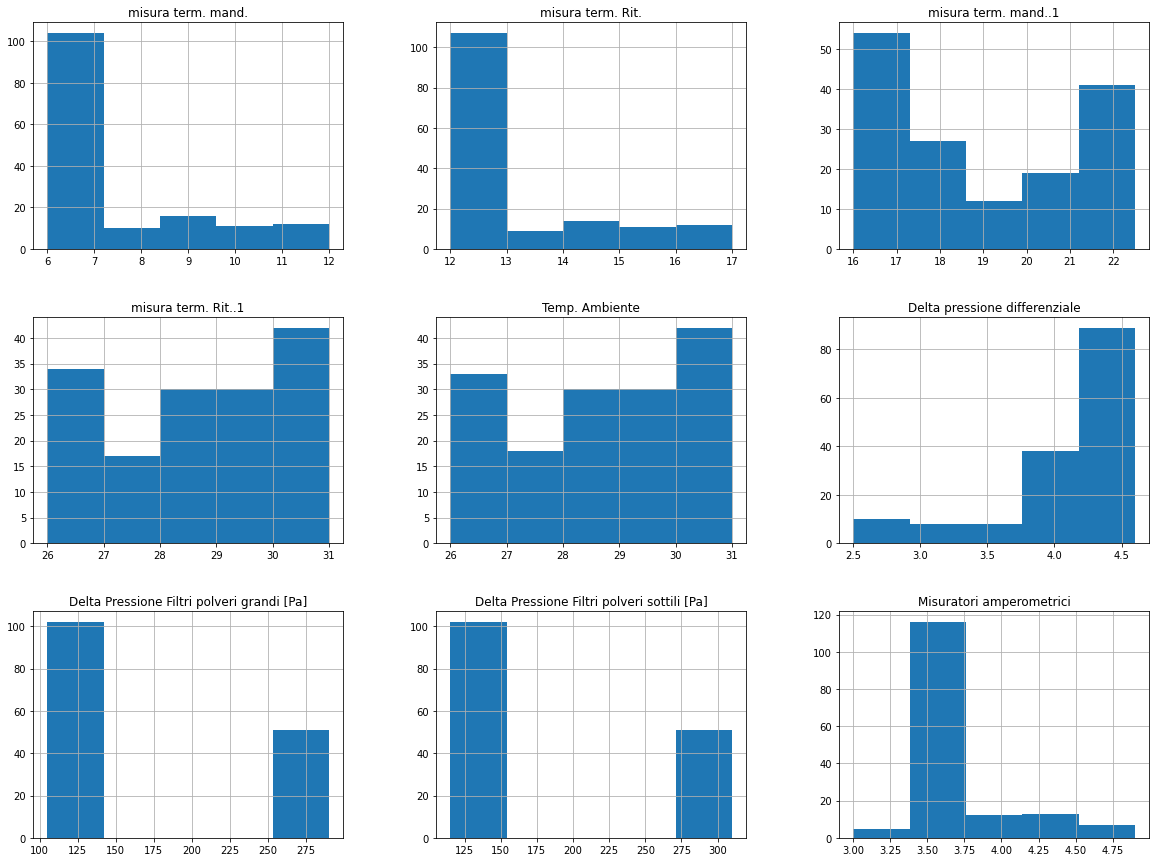

In [28]:
import matplotlib.pyplot as plt
data.hist(bins=5, figsize=(20,15))
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)

In [33]:
corr_matrix = data.corr()
corr_matrix["Temp. Ambiente"].sort_values(ascending=False)

Temp. Ambiente                                 1.000000
misura term. Rit..1                            0.998686
misura term. mand..1                           0.872261
Delta Pressione Filtri polveri grandi [Pa]     0.585397
Delta Pressione Filtri polveri sottili [Pa]    0.583349
misura term. mand.                             0.367628
misura term. Rit.                              0.339895
Misuratori amperometrici                      -0.126814
Delta pressione differenziale                 -0.248002
Name: Temp. Ambiente, dtype: float64

In [34]:
corr_matrix["Delta Pressione Filtri polveri grandi [Pa]"].sort_values(ascending=False)

Delta Pressione Filtri polveri grandi [Pa]     1.000000
Delta Pressione Filtri polveri sottili [Pa]    0.999724
misura term. mand..1                           0.833817
Temp. Ambiente                                 0.585397
misura term. Rit..1                            0.577046
Delta pressione differenziale                  0.307953
Misuratori amperometrici                      -0.166819
misura term. mand.                            -0.393737
misura term. Rit.                             -0.419767
Name: Delta Pressione Filtri polveri grandi [Pa], dtype: float64

In [36]:
corr_matrix["misura term. Rit."].sort_values(ascending=False)

misura term. Rit.                              1.000000
misura term. mand.                             0.993344
misura term. Rit..1                            0.340635
Temp. Ambiente                                 0.339895
misura term. mand..1                           0.093606
Misuratori amperometrici                      -0.295690
Delta Pressione Filtri polveri grandi [Pa]    -0.419767
Delta Pressione Filtri polveri sottili [Pa]   -0.420253
Delta pressione differenziale                 -0.719916
Name: misura term. Rit., dtype: float64

In [59]:
from sklearn import tree

training_data  = train_set.drop("Classe",axis=1)
training_label = train_set["Classe"].copy()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_data, training_label)

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_6 <= 180.00
|   |--- feature_5 <= 3.90
|   |   |--- class: P
|   |--- feature_5 >  3.90
|   |   |--- feature_8 <= 3.95
|   |   |   |--- feature_0 <= 7.25
|   |   |   |   |--- feature_2 <= 16.25
|   |   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |   |--- class: A
|   |   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |   |--- class: N
|   |   |   |   |--- feature_2 >  16.25
|   |   |   |   |   |--- class: A
|   |   |   |--- feature_0 >  7.25
|   |   |   |   |--- feature_2 <= 16.25
|   |   |   |   |   |--- class: N
|   |   |   |   |--- feature_2 >  16.25
|   |   |   |   |   |--- class: C
|   |   |--- feature_8 >  3.95
|   |   |   |--- class: V
|--- feature_6 >  180.00
|   |--- class: F

